<a href="https://colab.research.google.com/github/lungievargas/Auction-System-Using-JSP/blob/master/BRAIN_TUMOR_MRi_IMAGE_CLASSIFICATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Intentions


The primary goal of this project is to develop a robust machine learning model capable of accurately classifying brain tumor MRI images. By leveraging deep learning techniques, specifically Convolutional Neural Networks (CNNs), the project aims to enhance diagnostic capabilities in medical imaging. The intention is to assist healthcare professionals in identifying different types of brain tumors effectively, ultimately improving patient outcomes through timely and informed decision-making.

Additionally, the project incorporates explainable AI techniques to provide insights into the model's decision-making process. By employing methods like Grad-CAM (Gradient-weighted Class Activation Mapping), the project seeks to visualize which areas of the MRI images the model focuses on when making predictions. This transparency is crucial in a medical context, as it helps clinicians understand the rationale behind the model's outputs.

Another significant intention of the project is to develop a system that provides actionable recommendations based on model predictions. For instance, if the model predicts a high likelihood of a tumor requiring immediate surgery, it will output a color-coded suggestion (e.g., red for immediate action, yellow for monitoring, green for no immediate action). This feature aims to enhance the decision-making process for medical professionals, ensuring that critical cases receive prompt attention.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import os
import cv2

MOUNTING GOOGLE DRIVE AND LOADING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
from sklearn.utils import shuffle

# Define the path to your dataset
base_path = '/content/drive/MyDrive/Brain Tumor MRi dataset/'

# Function to load and clean images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)

                # Check if image was loaded correctly
                if img is None:
                    print(f"Warning: {img_path} could not be loaded.")
                    continue

                # Resize image and normalize pixel values
                img = cv2.resize(img, (128, 128))
                img = img / 255.0  # Normalizing to the range [0, 1]

                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Loading and cleaning datasets
images_1, labels_1 = load_images_from_folder(os.path.join(base_path, 'glioma'))
images_2, labels_2 = load_images_from_folder(os.path.join(base_path, 'healthy'))
images_3, labels_3 = load_images_from_folder(os.path.join(base_path, 'meningioma'))
images_4, labels_4 = load_images_from_folder(os.path.join(base_path, 'pituitary'))

# Combining datasets
images = np.concatenate((images_1, images_2, images_3, images_4))
labels = np.concatenate((labels_1, labels_2, labels_3, labels_4))

# Shuffle the dataset to ensure randomness
images, labels = shuffle(images, labels, random_state=42)

print("Data loaded and cleaned successfully.")


Mounted at /content/drive
Data loaded and cleaned successfully.



***PART 1: PREPROCESSING AND DATASET SPLITTING***

In the preprocessing and dataset splitting part, I first imported the necessary libraries: train_test_split, which splits the dataset into training and testing sets; LabelEncoder, which converts class labels like "glioma" and "healthy" into numerical values; and to_categorical, which changes those numerical labels into a one-hot encoded format that deep learning models use for classification. After that, the images are normalized by dividing their pixel values by 255.0, so they fall within the range of [0, 1], which helps the model learn better. Then, I encoded the labels into numbers using LabelEncoder and convert them into a format suitable for classification using to_categorical. My dataset is split into 80% training data and 20% testing data, ensuring that the model can learn from most of the data while being evaluated on unseen examples. I also printed the shapes of the datasets to confirm they are loaded correctly, with the images reshaped into a standard size of 128x128 pixels and the labels arranged based on the number of classes.

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split  # this Splits the dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder        # this line Converts string-based class labels into numerical values
from tensorflow.keras.utils import to_categorical     # Transforms numerical labels into one-hot encoded vectors
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # For loading and converting images

# Define the base path to your dataset
base_path = '/content/drive/MyDrive/Brain Tumor MRi dataset/'

# Initializing lists to hold images and labels
images = []
labels = []

# Looping through the image folder and load images and labels (assuming the folder has images categorized by subfolders or names)
for root, dirs, files in os.walk(base_path): # use os.walk to traverse subdirectories
    for filename in files: # iterate over files only
        # Load the image
        image_path = os.path.join(root, filename)

        # Checking if the file is an image file (e.g., has a .jpg, .png extension)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')): #this condition is added to filter for image files
            image = load_img(image_path, target_size=(128, 128))
            image = img_to_array(image)  # Converting the image to a NumPy array
            images.append(image)

            label = filename.split('.')[0]
            labels.append(label)

# Converting the list of images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalizing images by dividing by 255 to get pixel values between 0 and 1
images = images / 255.0

# Encoding labels to numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Verifying  encoded_labels and checking if they contains any data
print(encoded_labels)
print(encoded_labels.shape)

# Adding a condition to handle an empty encoded_labels array
if encoded_labels.size > 0:
    # One-hot encoding of labels for classification
    one_hot_labels = to_categorical(encoded_labels)
else:
    # Raising an exception to stop the script executions
    raise ValueError("Error: No labels available for one-hot encoding. Please check your dataset.")

# Splitting dataset into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# Output the shape of training and testing data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

[992 999 991 ... 756 750 752]
(7023,)
Training data shape: (5618, 128, 128, 3)
Testing data shape: (1405, 128, 128, 3)


***EXPLAINATION OF RESULTS/ OUTPUT ABOVE***

The output shows three pieces of information: the first part, [997 992 999 ... 756 750 752], represents a list of numerical labels for the training images, indicating which class each image belongs to (e.g., glioma, healthy, etc.). The second part, (7023,), indicates the total number of labels available in this dataset, which is 7,023 in total. Finally, the shapes of the training and testing data indicate that the training dataset contains 5,618 images, each resized to 128x128 pixels with 3 color channels (RGB), while the testing dataset contains 1,405 images in the same format. Of which means  that we have a good amount of training data to help the model learn and a separate set of testing data to evaluate how well the model performs on unseen images.

***TRAINING CONVOLUTIONAL NEURAL NETWORK MODEL***
When training a Convolutional Neural Network (CNN) for brain tumor MRI image classification, start by preprocessing the data by normalizing image pixel values to the range [0, 1] and using one-hot encoding for class labels to facilitate multi-class classification. The model architecture should consist of convolutional layers that extract features using ReLU activation, followed by pooling layers to reduce spatial dimensions and mitigate overfitting. Dense layers process the features, with the final layer having neurons equal to the number of classes and using softmax activation for probability distribution. Compile the model using the Adam optimizer for adaptive learning rates and categorical crossentropy as the loss function, while tracking accuracy as the evaluation metric. During training, monitor performance on a validation set to prevent overfitting, and evaluate the model on a test dataset after training to obtain metrics like loss and accuracy. Hyperparameter tuning is essential, so experiment with different architectures, learning rates, batch sizes, and dropout rates to optimize performance. Incorporate regularization techniques, such as dropout layers, to further reduce overfitting by randomly deactivating a fraction of neurons during training.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Defining the path to my dataset
base_path = '/content/drive/MyDrive/Brain Tumor MRi dataset/'

# Step 2: Function to load images
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                # Adding a check to ensure the file is an image file
                if filename.lower().endswith(('.jpg', '.jpeg', '.png')): #this condition is added to filter for image files
                    img = cv2.imread(img_path)
                    # Checking if the image was loaded successfully
                    if img is not None:
                        img = cv2.resize(img, (128, 128))
                        images.append(img)
                        labels.append(label)
                    else:
                        print(f"Error loading image: {img_path}")  # Print an error message
    return np.array(images), np.array(labels)

# Step 3: Loading the datasets
images, labels = load_images_from_folder(base_path)

# Step 4: Normalizing the images
images = images.astype('float32') / 255.0 # Scaling pixel values to [0, 1]

# Step 5: Encoding the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

# Step 6: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# Step 7: Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularization to prevent overfitting
    layers.Dense(len(np.unique(encoded_labels)), activation='softmax')  # Output layer for multiple classes
])

# Step 8: Compiling the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 9: Training the model
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

# Step 10: Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
#saving the trained model
model.save('brain_tumor_cnn_model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/8
176/176 [==============================] - 20s 108ms/step - loss: 0.7188 - accuracy: 0.6951 - val_loss: 0.4210 - val_accuracy: 0.8448
Epoch 2/8
176/176 [==============================] - 18s 101ms/step - loss: 0.4060 - accuracy: 0.8444 - val_loss: 0.3067 - val_accuracy: 0.8747
Epoch 3/8
176/176 [==============================] - 18s 100ms/step - loss: 0.2948 - accuracy: 0.8871 - val_loss: 0.2732 - val_accuracy: 0.8883
Epoch 4/8
176/176 [==============================] - 18s 100ms/step - loss: 0.2266 - accuracy: 0.9219 - val_loss: 0.1777 - val_accuracy: 0.9338
Epoch 5/8
176/176 [==============================] - 18s 100ms/step - loss: 0.1545 - accuracy: 0.9455 - val_loss: 0.1626 - val_accuracy: 0.9395
Epoch 6/8
176/176 [==============================] - 18s 100ms/step - loss: 0.1195 - accuracy: 0.9559 - val_loss: 0.1246 - val_accuracy: 0.9559
Epoch 7

***EXPLAINATION OF RESULTS :***

These results indicates that the  training process of the model with 8 epochs. Firstly, the model started with a lower accuracy of 60% and higher loss of 94% in Epoch 1. However, as the epochs progressed, both accuracy and validation accuracy steadily improved, with training accuracy reaching 97% by the final epoch and validation accuracy peaking at 96% in Epoch 7. Similarly, both training and validation loss decreased, indicating that the model is learning effectively without any significant overfitting. In the final evaluation on the test set, the model achieved an accuracy of 96% and a test loss of 0.1149, demonstrating strong generalization and performance on unseen data.

***PART 2: USING EXPLAINABLE AI TECHNIQUE(GRAD-CAM)***

In the Explainable AI (XAI) section, I used Grad-CAM, a method that helps explain the decisions of a deep learning model by showing which parts of an image were important for the model's prediction. Grad-CAM works by generating a heatmap that highlights areas of the image that contributed most to the prediction. First, I build a modified version of the trained model that outputs both the prediction and the feature maps of the last convolutional layer. Then, using tf.GradientTape, we calculate how much each part of the image influences the model's decision by computing gradients. These gradients are used to create a heatmap that shows which areas of the image the model focused on. Finally, we overlay this heatmap on the original image, allowing us to visually see why the model predicted a specific class, making the model’s decisions more interpretable and easier to understand. This is especially useful in medical image classification, where understanding the model’s reasoning is critical for trust and validation.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Failed to load image: /content/drive/MyDrive/Brain Tumor MRi dataset/healthy/mri.nii
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                      

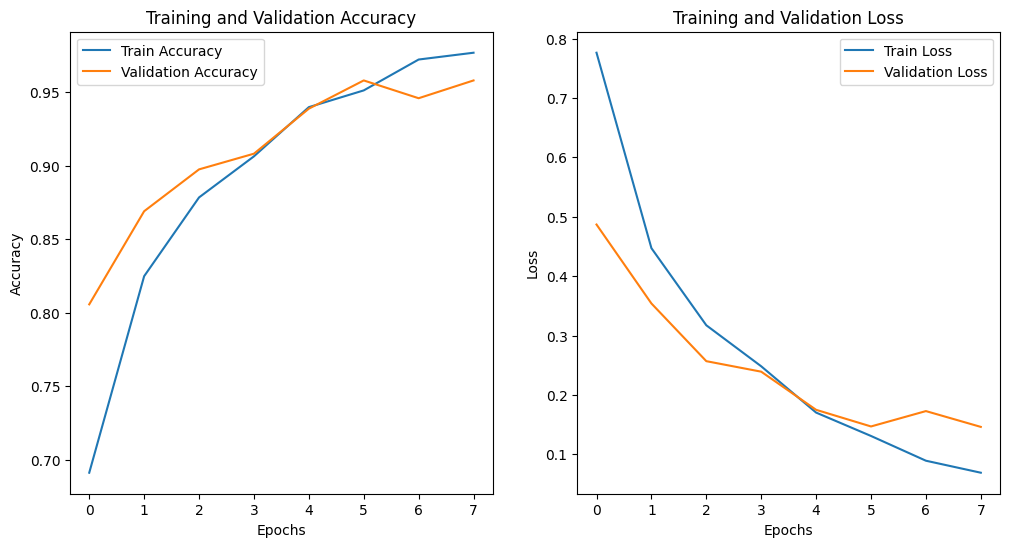

44/44 [==============================] - 1s 27ms/step


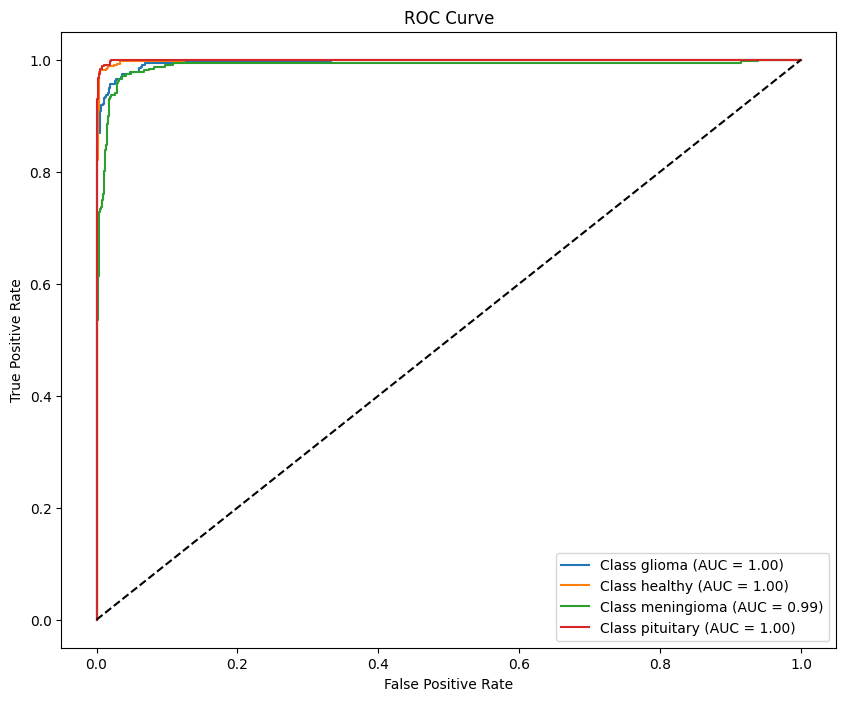

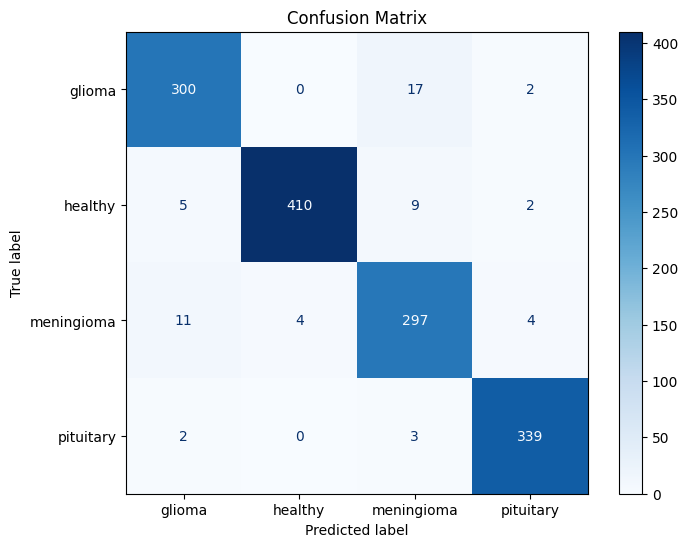

In [ ]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Define the path to your dataset
base_path = '/content/drive/MyDrive/Brain Tumor MRi dataset/'

# Step 2: Function to load images from folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

# Step 3: Load datasets
images, labels = load_images_from_folder(base_path)

# Step 4: Normalize images
images = images.astype('float32') / 255.0

# Step 5: Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
one_hot_labels = to_categorical(encoded_labels)

# Step 6: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)

# Step 7: Build the CNN model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(np.unique(encoded_labels)), activation='softmax')
])

# Print model summary
model.summary()

# Step 8: Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_data=(X_test, y_test))

# Step 10: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Step 11: Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Step 12: ROC Curve Analysis
# Predict probabilities for the test set
y_pred_proba = model.predict(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(one_hot_labels[0])):  # Iterate over each class
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Step 13: Confusion Matrix Analysis
# Convert predicted probabilities to predicted class labels
y_pred_labels = np.argmax(y_pred_proba, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.show()


USING GRAD-CAM AND HEATMAPS

> Add blockquote



Code below visualizes how a deep learning model detects glioma tumors in images using a Grad-CAM. It starts by loading images from different folders, where each folder contains images of a specific type of tumor or healthy tissue. The model predicts the type of tumor in these images. Then, for each glioma image, the code calculates a heatmap that highlights the areas of the image where the model is focusing its attention. Finally, it overlays this heatmap onto the original image so that you can easily see which parts of the glioma images are being identified as significant by the model. The heatmap uses color to indicate the intensity of attention, helping to explain the model's predictions.

LOADING THE MODEL AND INSPECTING LAYERS


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Loading  the trained model
model = load_model('brain_tumor_cnn_model.keras')

# Printing model layers to identify the last convolutional layer
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
import numpy as np
from tensorflow.keras import models

def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Creating a model that maps the input image to the activations of the last conv layer and predictions
    grad_model = models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Computing the gradient of the top predicted class for the target layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # This computes the gradient of the class with respect to the feature map
    grads = tape.gradient(class_channel, conv_outputs)

    # Pool the gradients over all the axes except the depth
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is" for the predicted class
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 & 1 for easy visualization
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap.numpy()


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define base path where the dataset is stored
base_path = '/content/drive/MyDrive/Brain Tumor MRi dataset/'

# Specify the subfolder for glioma images within the base path
glioma_folder = os.path.join(base_path, 'glioma')  # Adjust this based on your dataset structure

# List all image files in the glioma folder
glioma_images = [os.path.join(glioma_folder, fname) for fname in os.listdir(glioma_folder) if fname.endswith('.jpg')]

# Load and preprocess the first glioma image as an example
img_path = glioma_images[0]  # Example: Load the first glioma image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size if your model has a different input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
# Check model layers to confirm the layer name
for layer in model.layers:
    print(layer.name)


conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
flatten
dense
dropout
dense_1


In [ ]:
import cv2  # Required for image processing
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import load_model

# Loading the trained model
model = load_model('brain_tumor_cnn_model.keras')  # Replace with your model path

# Defining get_gradcam_heatmap function
def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Creating a model that maps the input image to the activations of the last conv layer and predictions
    grad_model = models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Computing the gradient of the top predicted class for the target layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # This computes the gradient of the class with respect to the feature map
    grads = tape.gradient(class_channel, conv_outputs)

    # Pool the gradients over all the axes except the depth
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is" for the predicted class
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 & 1 for easy visualization
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap.numpy()

def display_gradcam_overlay(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = image.load_img(img_path, target_size=(128, 128))
    img = image.img_to_array(img)

    # Resize heatmap to match image size
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # Convert heatmap to RGB and normalize
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on image
    overlay_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return overlay_img

# Function to process images and generate heatmaps
def generate_heatmaps(base_paths, num_images=5):
    for tumor_type, base_path in base_paths.items():
        # List all images in the tumor folder
        image_files = [f for f in os.listdir(base_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Process only the first `num_images` images
        for i, image_name in enumerate(image_files[:num_images]):
            img_path = os.path.join(base_path, image_name)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Set the last convolutional layer name and generate the heatmap
            last_conv_layer_name = 'conv2d_5'  # Update with the correct layer name from your model
            heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name)



In [ ]:
#!pip install tensorflow opencv-python matplotlib

import cv2  # Required for image processing
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import load_model


# Loading the trained model
model = load_model('brain_tumor_cnn_model.keras')  # Replace with your model path

# Defining get_gradcam_heatmap function
def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Creating a model that maps the input image to the activations of the last conv layer and predictions
    grad_model = models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Computing the gradient of the top predicted class for the target layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # This computes the gradient of the class with respect to the feature map
    grads = tape.gradient(class_channel, conv_outputs)

    # Pool the gradients over all the axes except the depth
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is" for the predicted class
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 & 1 for easy visualization
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap.numpy()

# Function to overlay Grad-CAM heatmap on the original image
def display_gradcam_overlay(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (heatmap.shape[1], heatmap.shape[0]))

    # Rescale heatmap to range [0, 255]
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the image
    overlay_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return overlay_img

# Function to process images and generate heatmaps
def generate_heatmaps(base_paths, num_images=5):
    for tumor_type, base_path in base_paths.items():
        # List all images in the tumor folder
        image_files = [f for f in os.listdir(base_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Process only the first `num_images` images
        for i, image_name in enumerate(image_files[:num_images]):
            img_path = os.path.join(base_path, image_name)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(128, 128)) # Adjust size if your model has a different input size
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Set the last convolutional layer name and generate the heatmap
            last_conv_layer_name = 'conv2d_5'  # Update with the correct layer name from your model
            heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name)

#!pip install tensorflow opencv-python matplotlib

import cv2  # Required for image processing
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.models import load_model


# Loading the trained model
model = load_model('brain_tumor_cnn_model.keras')  # Replace with your model path

# Defining get_gradcam_heatmap function
def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Creating a model that maps the input image to the activations of the last conv layer and predictions
    grad_model = models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    # Computing the gradient of the top predicted class for the target layer
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # This computes the gradient of the class with respect to the feature map
    grads = tape.gradient(class_channel, conv_outputs)

    # Pool the gradients over all the axes except the depth
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is" for the predicted class
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap between 0 & 1 for easy visualization
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap.numpy()

# Function to overlay Grad-CAM heatmap on the original image
def display_gradcam_overlay(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (heatmap.shape[1], heatmap.shape[0]))

    # Rescale heatmap to range [0, 255]
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Overlay the heatmap on the image
    overlay_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return overlay_img

# Function to process images and generate heatmaps
def generate_heatmaps(base_paths, num_images=5):
    for tumor_type, base_path in base_paths.items():
        # List all images in the tumor folder
        image_files = [f for f in os.listdir(base_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Process only the first `num_images` images
        for i, image_name in enumerate(image_files[:num_images]):
            img_path = os.path.join(base_path, image_name)

            # Load and preprocess the image
            img = image.load_img(img_path, target_size=(128, 128)) # Adjust size if your model has a different input size
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            # Set the last convolutional layer name and generate the heatmap
            last_conv_layer_name = 'conv2d_5'  # Update with the correct layer name from your model
            heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name)

            # Display Grad-CAM overlay
            overlay_img = display_gradcam_overlay(img_path, heatmap)
            plt.imshow(overlay_img.astype(np.uint8))
            plt.title

***TUMOR GRADING***
Tumor grading is a clinical assesment which is based on tumor history or in simple terms how abnormal the the cells are and it is very crucial for prognosis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import os

# Define base directory
base_data_dir = '/content/drive/MyDrive/Brain Tumor MRi dataset'

# Model architecture for tumor grading
def build_tumor_grade_model(input_shape=(128, 128, 3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer for grades I-IV
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and summarize the model
model = build_tumor_grade_model()
model.summary()

# Training parameters
batch_size = 32
epochs = 3

# Data augmentation with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

try:
    # Load training data with validation split
    train_generator = datagen.flow_from_directory(
        base_data_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_generator = datagen.flow_from_directory(
        base_data_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please check if the path is correct and if the Google Drive is mounted properly.")
    raise

# Model training
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Save the trained model
model.save('tumor_grade_model.h5')
print("Model training complete and saved as 'tumor_grade_model.h5'")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Found 5620 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.
Epoch 1/3
103/176 ━━━━━━━━━━━━━━━━━━━━ 5:26 4s/step - accuracy: 0.4188 - loss: 1.2241

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Load the pre-trained tumor grading model
model_path = '/content/tumor_grade_model.h5'
try:
    tumor_grade_model = load_model(model_path)
    print("Tumor grading model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    tumor_grade_model = None

def create_tumor_mask(image_path, threshold_value=150):
    # Load the original MRI image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: MRI image could not be loaded.")
        return None

    # Apply Gaussian blur to reduce noise and improve thresholding
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply thresholding to create a binary mask
    _, tumor_mask = cv2.threshold(blurred_image, threshold_value, 255, cv2.THRESH_BINARY)

    # Find contours of the tumor region
    contours, _ = cv2.findContours(tumor_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty mask to draw contours
    mask = np.zeros_like(tumor_mask)

    # Draw the largest contour assuming it's the tumor region
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    return mask

def calculate_tumor_size(tumor_mask):
    # Check if tumor_mask is loaded successfully
    if tumor_mask is None:
        print("Error: Tumor mask image could not be loaded.")
        return -1

    # Calculate tumor area by counting white pixels
    tumor_area = np.sum(tumor_mask > 0)  # Count pixels that belong to the tumor
    pixel_area = 0.5  # mm^2 per pixel (adjust based on your dataset)
    tumor_size = tumor_area * pixel_area  # Size in mm^2

    return tumor_size

def predict_tumor_grade(image_path):
    if tumor_grade_model is None:
        print("Tumor grading model is not loaded.")
        return None

    # Load the image for grading
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image could not be loaded.")
        return None

    # Preprocess the image (resize, normalize, etc.)
    image = cv2.resize(image, (224, 224))  # Resize to model input size
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the tumor grade
    predictions = tumor_grade_model.predict(image)
    grade = np.argmax(predictions) + 1  # Adjust index if grades start from 1

    return grade

# Example usage: Create tumor mask, calculate tumor size, and predict tumor grade
mri_image_path = '/content/mri.png'  # Path to MRI image

# Step 1: Check if the MRI image file exists
if not os.path.exists(mri_image_path):
    print(f"Error: File not found at '{mri_image_path}'")
else:
    # Step 2: Generate the tumor mask from the MRI image
    tumor_mask = create_tumor_mask(mri_image_path, threshold_value=150)
    if tumor_mask is not None:
        # Optionally save the tumor mask
        cv2.imwrite('tumor_mask.png', tumor_mask)

        # Step 3: Calculate the tumor size
        tumor_size = calculate_tumor_size(tumor_mask)
        if tumor_size != -1:
            print(f'Tumor Size: {tumor_size} mm^2')

    # Step 4: Predict the tumor grade if the model is available
    tumor_grade = predict_tumor_grade(mri_image_path)
    if tumor_grade is not None:
        print(f'Tumor Grade: {tumor_grade}')


Error loading model: No file or directory found at /content/tumor_grade_model.h5
Error: File not found at '/content/mri.png'


In [ ]:
def check_tumor_location(tumor_mask):
    # Check if tumor_mask is valid before processing
    if tumor_mask is None:
        print("Warning: Tumor mask is None. Cannot determine location.")
        return False  # Return False if tumor mask is not available

    # Find the center of the tumor by calculating its centroid (mean position of pixels)
    tumor_pixels = np.argwhere(tumor_mask == 255)  # Get all tumor pixel coordinates (binary mask)

    # Check if tumor pixels were found
    if tumor_pixels.size == 0:
        print("Warning: No tumor pixels found in the mask.")
        return False  # Return False if no tumor pixels are found

    centroid = np.mean(tumor_pixels, axis=0)  # Compute centroid (average of x and y positions)

    # Define regions of interest (example: motor cortex, speech area in normalized coordinates)
    critical_regions = [
        ((30, 50), (40, 60)),
        ((70, 110), (80, 120))
    ]

    # Check if the centroid lies within any of the critical regions
    for region in critical_regions:
        x_range, y_range = region
        if x_range[0] <= centroid[0] <= x_range[1] and y_range[0] <= centroid[1] <= y_range[1]:
            return True  # Tumor is in a critical region
    return False  # Tumor is not in a critical region

In [ ]:
def prognosis(img_path, tumor_mask_path):
    # Predict tumor grade
    grade = predict_tumor_grade(img_path)

    # Load the tumor mask and calculate size
    tumor_mask = cv2.imread(tumor_mask_path, cv2.IMREAD_GRAYSCALE)
    tumor_size = calculate_tumor_size(tumor_mask)

    # Check tumor location (critical or not)
    location_is_critical = check_tumor_location(tumor_mask)

    # Output the prognosis
    print(f'Tumor Grade: {grade}')
    print(f'Tumor Size: {tumor_size} mm^2')
    print(f'Tumor Location: {"Critical Region" if location_is_critical else "Non-critical Region"}')

    # Simple prognosis logic based on grade, size, and location
    if grade > 2 or tumor_size > 5000 or location_is_critical:
        print("Prognosis: Poor - High-risk tumor")
    else:
        print("Prognosis: Good - Low-risk tumor")

# Example: Provide image path and mask path for prognosis
img_path = 'path_to_mri_image.jpg'
tumor_mask_path = 'path_to_tumor_mask.png'
prognosis(img_path, tumor_mask_path)


GUI AND MEDICAL REPORT

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from transformers import pipeline
import numpy as np

# Load CNN model and NLP pipeline
cnn_model = load_model('/content/tumor_grade_model.h5')  # Replace with your model path
report_generator = pipeline("text-generation", model="gpt2")  # GPT-2 for report generation

# Severity levels
severity_levels = ['Grade I', 'Grade II', 'Grade III', 'Grade IV']

# Function to predict tumor severity
def predict_tumor_severity(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Replace target size if different
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    prediction = cnn_model.predict(img_array)
    return severity_levels[np.argmax(prediction)]

# Function to generate medical report
def generate_medical_report(severity, tumor_details):
    prompt = f"The patient has been diagnosed with a brain tumor of severity: {severity}. The details are: {tumor_details}. Generate a concise medical report:"
    report = report_generator(prompt, max_length=150, num_return_sequences=1)
    return report[0]['generated_text']

# Function to handle "Analyze" button click
def analyze_image():
    if not image_path.get():
        messagebox.showerror("Error", "Please select an image.")
        return

    try:
        # Predict severity
        severity = predict_tumor_severity(image_path.get())
        severity_label.config(text=f"Severity: {severity}")

        # Generate medical report
        tumor_details = details_entry.get("1.0", tk.END).strip()
        report = generate_medical_report(severity, tumor_details)
        report_text.delete("1.0", tk.END)
        report_text.insert(tk.END, report)

        messagebox.showinfo("Success", "Analysis complete!")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Function to open file dialog
def select_image():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    if file_path:
        image_path.set(file_path)
        # Display the selected image
        img = Image.open(file_path)
        img.thumbnail((300, 300))
        img = ImageTk.PhotoImage(img)
        img_label.config(image=img)
        img_label.image = img

# Initialize GUI
root = tk.Tk()
root.title("Brain Tumor Analyzer")
root.geometry("800x600")
root.resizable(False, False)

# Image selection section
image_path = tk.StringVar()
tk.Label(root, text="Select Brain MRI Image:", font=("Arial", 14)).pack(pady=10)
tk.Button(root, text="Browse", command=select_image).pack()
img_label = tk.Label(root)
img_label.pack(pady=10)

# Tumor details section
tk.Label(root, text="Enter Tumor Details:", font=("Arial", 14)).pack(pady=10)
details_entry = tk.Text(root, height=5, width=50)
details_entry.pack(pady=5)

# Analyze button
tk.Button(root, text="Analyze", font=("Arial", 14), bg="green", fg="white", command=analyze_image).pack(pady=10)

# Results section
severity_label = tk.Label(root, text="Severity: N/A", font=("Arial", 14))
severity_label.pack(pady=5)

tk.Label(root, text="Generated Medical Report:", font=("Arial", 14)).pack(pady=10)
report_text = tk.Text(root, height=10, width=70)
report_text.pack(pady=5)

# Run the application
root.mainloop()


In [ ]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load pre-trained model
model_path = '/content/tumor_grade_model.h5'
cnn_model = load_model(model_path)

# Function to predict severity
def predict_tumor_severity(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))  # Assuming 224x224 input
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = cnn_model.predict(img_array)
    severity_levels = ['Grade I', 'Grade II', 'Grade III', 'Grade IV']  # Example labels
    predicted_severity = severity_levels[np.argmax(prediction)]

    return predicted_severity

# Folder containing the images
image_folder = '/content/drive/MyDrive/Brain Tumor MRi dataset/pituitary'

# Get list of image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Limit to 3 images
image_files = image_files[:3]

# Display severity for each image
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    severity = predict_tumor_severity(image_path)
    print(f"Image: {image_file}, Predicted Severity: {severity}")


In [ ]:
!jupyter nbconvert --to pdf'BRAIN TUMOR MRi IMAGE CLASSIFICATION'

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr